# Estimación del beta de una acción


- Mide como es que un activo se mueve en relación al mercado
- Si tengo un portafoliop y le añado un activo, en realidad es más importante saber como se mueve este activo en relación a mi portafolio existente que su volatilidad misma


Pensando en terminos de regresión, ¿puedo utilizar el rendimiento del mercado para predecir un activo individual?

$$r_i = \alpha_i +  \beta_i r_{market}$$

Notese que $\beta$ también puede ser:

$$\beta_i = \frac{cov(i, market)}{var(market)}$$


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />


# Caso ejemplo Beta: Google y la bolsa de valores

In [40]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['VTI', 'VGT']
start_date = '2015-01-01'
end_date = "2022-10-01"


St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

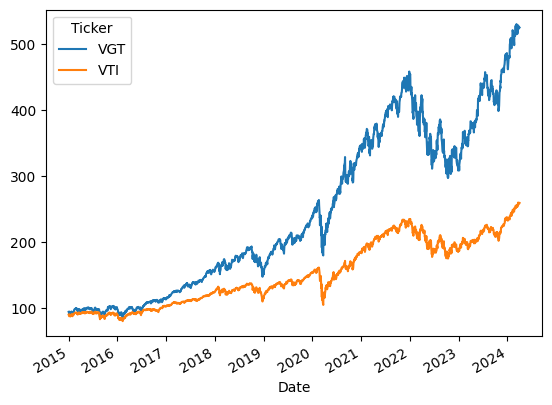

In [41]:
# Grafique google y el mercado de estados unidos
St[["VGT", "VTI"]].plot()

# Normalizar precios

Dividimos los precios entre el precio inicial

In [42]:
# Crea un data frame que tiene precios normalizados
St["normalized_VGT"] = St["VGT"] / St["VGT"].iloc[0]
St["normalized_VTI"] = St["VTI"] / St["VTI"].iloc[0]

<Axes: xlabel='Date'>

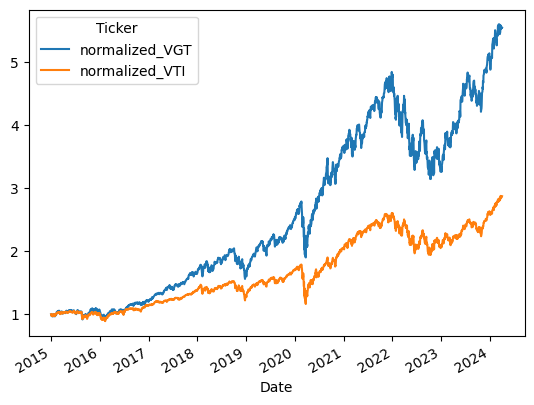

In [43]:
# Visualización de precios normalizados
St[["normalized_VGT", "normalized_VTI"]].plot()

In [44]:
# Gráfico que compara rendimientos


# Calculemos $\beta$ de google y el mercado

$$r_i = \alpha_i +  \beta_i r_{market}$$


Text(0, 0.5, 'Mercado')

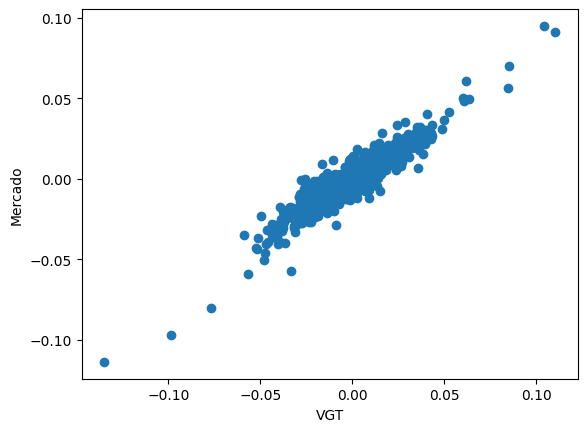

In [45]:
plt.scatter(rt.VGT, rt.VTI)
plt.xlabel("VGT")
plt.ylabel("Mercado")

In [46]:
# Grafique el modelo

In [47]:
# Calcular beta con regresión
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = rt[["VTI"]]
y = rt[["VGT"]]

model.fit(X, y)
model.coef_[0][0]

1.194265110140033

$$VGT = 1.19 * mercado$$

$$\beta_i = \frac{Cov(google, market)}{Var(market)} $$

In [48]:
# Calcular beta con covarianza y varianza
rt.cov()["VGT"]["VTI"] / rt.VTI.var()

1.1942651101400337

In [49]:
rt["predictions"] = model.predict(X)

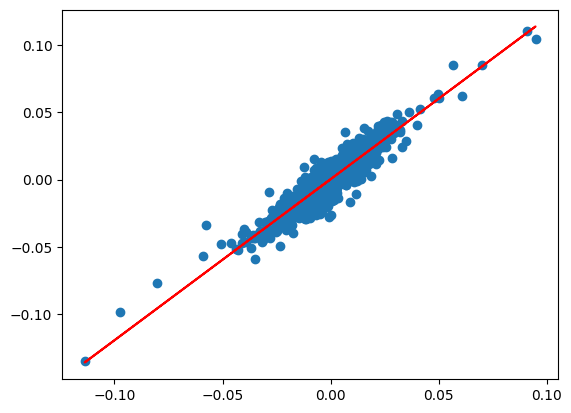

In [50]:
plt.scatter(rt.VTI, rt.VGT)
plt.plot(rt.VTI, rt.predictions, color="red")


# Calcula el R2 de nuestro modelo

In [51]:
# Prediga y ponga el promedio
error_modelo = np.var(rt.VGT - rt.predictions)
error_promedio = np.var(rt.VGT - rt.VGT.mean())

In [52]:
(error_promedio - error_modelo)/ error_promedio

0.8626936999810519

In [53]:
# Defina las varianzas
from sklearn.metrics import r2_score
r2_score(y_pred=rt.predictions, y_true=y)

0.8626936999810519

In [54]:
# Calcule el R2


# Vamos a descargar algunos activos del mercado estadounidense y calcular la beta de cada activo

In [55]:
# Descargar precios y graficar
tickers = ['VTI', 'GOOGL', 'EFX', 'COST', 'WMT', 'PG',
     'DIS', 'IBM', 'AMZN', 'TGT', 'JPM', 'INTC',
    'MSFT', 'BLK', 'NFLX']

St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

[*********************100%%**********************]  15 of 15 completed


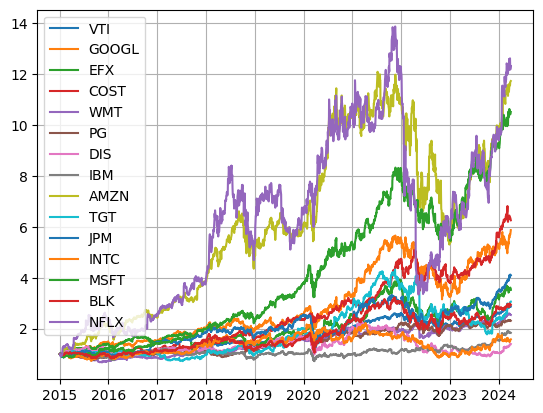

In [56]:
# Normalizamos todos los activos
for i in tickers:
    St["normalized_" + i] = St[i] / St[i].iloc[0]
    plt.plot(St["normalized_" + i], label=i)
plt.legend()
plt.grid()

In [57]:
# Veamos la normalización


In [73]:
# Calculemos beta, rendimiento y R2 de cada acción

r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt[["VTI"]]
    y = rt[[i]]

    #Calculo de beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)

    #calculo de R2
    predictions = model.predict(X)
    r2 = r2_score(y_true=y, y_pred=predictions)
    r2s.append(r2)

    #rendimiento
    rend = np.mean(rt[[i]])[0] * 252
    rendimiento.append(rend)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [76]:
df = pd.DataFrame()
df["tickers"] = tickers
df["betas"] = betas
df["r2"] = r2s
df["rendimientos"] = rendimiento

df

,tickers,betas,r2,rendimientos
0,VTI,1.000000,1.000000,0.131290
1,GOOGL,1.116965,0.514717,0.232506
2,EFX,0.984689,0.381212,0.179338
3,COST,0.702157,0.346421,0.222789
4,WMT,0.496056,0.182093,0.123627
5,PG,0.545980,0.286134,0.108169
6,DIS,1.002004,0.425288,0.075582
7,IBM,0.828883,0.401084,0.094751
8,AMZN,1.115358,0.380805,0.321477
9,TGT,0.806272,0.221944,0.170723


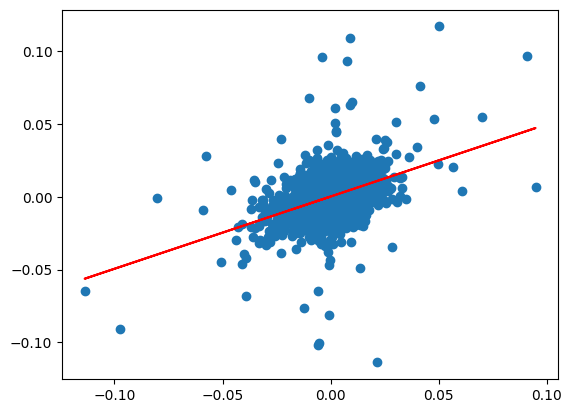

In [67]:
X = rt[["VTI"]]
y = rt[["WMT"]]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.WMT)
plt.plot(rt["VTI"], predictions, color="red")

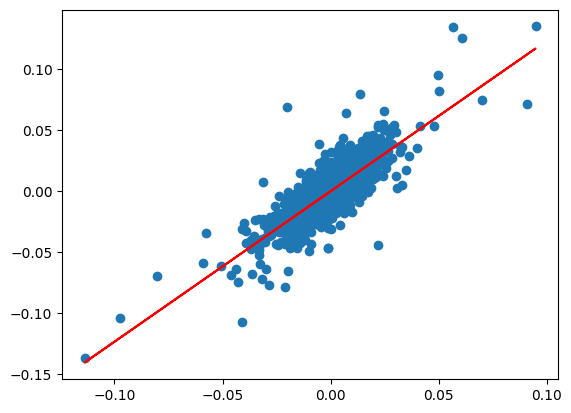

In [68]:
X = rt[["VTI"]]
y = rt[["BLK"]]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.BLK)
plt.plot(rt["VTI"], predictions, color="red")

0.1723684581408561


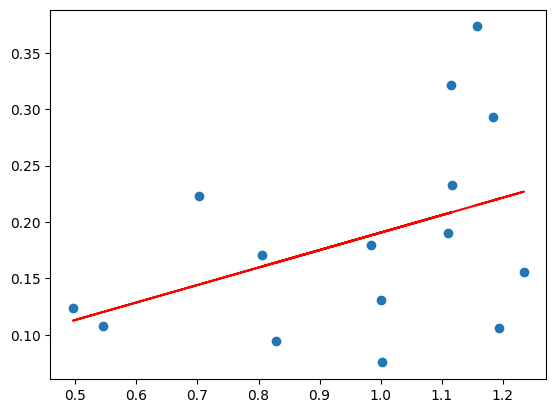

In [79]:
#  Poner todo en un data frame

# Regresion beta vs rendimientos
X = df[["betas"]]
y = df[["rendimientos"]]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color="red")

print(r2_score(y_pred=predictions, y_true=y))


In [ ]:
# Grafico, beta vs rendimiento
for i in range(len(df)):
    flag_df = df.iloc[i]
    plt.scatter(flag_df['betas'], flag_df['rendimientos'])
    plt.text(flag_df['betas'], flag_df['rendimientos'], flag_df['stock'])
plt.plot(df['betas'], df['predictions_beta_rendimiento'])
plt.grid(True)
plt.xlabel("Beta")
plt.ylabel("Rendimientos")

In [ ]:
# Grafico, beta vs R2
for i in range(len(df)):
    flag_df = df.iloc[i]
    plt.scatter(flag_df['betas'], flag_df['r2'])
    plt.text(flag_df['betas'], flag_df['r2'], flag_df['stock'])
plt.plot(df['betas'], df['predictions_beta_r2'])
plt.grid(True)
plt.xlabel("Beta")
plt.ylabel("Rendimientos")